In [1]:
from google.colab import drive
import zipfile
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [27]:
aviation_path = '/content/drive/MyDrive/Capstone Project/Maintnet DataSets/aviation.zip'
extract_path = '/content/aviation'

os.makedirs(extract_path, exist_ok=True)

with zipfile.ZipFile(aviation_path, 'r') as zip_ref:
    zip_ref.extractall(extract_path)

In [28]:
morpho_path = '/content/aviation/Aviation_Morphosyntactic_Dataset.csv'
termbank_dataset = '/content/aviation/Aviation_TermBanks_Dataset.csv'
abbrevs_path = '/content/aviation/words_and_abbreviations_with_column.xlsx'

In [29]:
morpho_df = pd.read_csv(morpho_path)
termbank_df = pd.read_csv(termbank_dataset)
abbrevs_df = pd.read_excel(abbrevs_path)

In [30]:
print(morpho_df.shape, termbank_df.shape, abbrevs_df.shape)
abbrevs_df.head()

(59, 6) (100, 2) (59, 3)


,Word,Description,abbreviations_4_letter
0,cylinder,repair,CYLI
1,gasket,repair,GASK
2,thrust,repair,THRU
3,inoperable,repair,INOP
4,hydraulic,repair,HYDR


In [31]:
termbank_df.head()

,Word,Example
0,baffle,cylinder baffle #4 intake leaking.
1,left,#2 & 4 left cylinder rocker cover gaskets leak...
2,right,induction right tube hose clamps loose (all cy...
3,cylinder,cylinder rocker box cover screws are loose.
4,gasket,#1 intake gasket leaking.


In [8]:
morpho_df.head()

,Word,Description,Compound,Lemma,Stem,Part of Speech (POS)
0,cylinder,repair,NaN,cylinder,cylinder,NN
1,gasket,repair,NaN,gasket,gasket,NN
2,thrust,repair,NaN,thrust,thrust,NN
3,inoperable,repair,NaN,inoperate,inoperabl,ADJ
4,hydraulic,repair,NaN,hydraulic,hydraulic,NN


##**Data Merging**



In [32]:
for df in [
    morpho_df,
    termbank_df,
    abbrevs_df
]:
    df.rename(columns={'Word': 'word'}, inplace=True)

aviation_merged_df = abbrevs_df.merge(
    morpho_df, on='word', how='inner', suffixes=('_abbr', '_morpho')
).merge(
    termbank_df, on='word', how='inner', suffixes=('_morpho', '_termbank'))
print("Final merged shape:", aviation_merged_df.shape)
aviation_merged_df.head()


Final merged shape: (49, 9)


,word,Description_abbr,abbreviations_4_letter,Description_morpho,Compound,Lemma,Stem,Part of Speech (POS),Example
0,cylinder,repair,CYLI,repair,NaN,cylinder,cylinder,NN,cylinder rocker box cover screws are loose.
1,cylinder,repair,CYLI,repair,cylinder head temperature,cylinder,cylinder,NN,cylinder rocker box cover screws are loose.
2,gasket,repair,GASK,repair,NaN,gasket,gasket,NN,#1 intake gasket leaking.
3,thrust,repair,THRU,repair,NaN,thrust,thrust,NN,on start up engine began to run rough. ran en...
4,inoperable,repair,INOP,repair,NaN,inoperate,inoperabl,ADJ,engine run rough flight inoperable.


In [33]:
aviation_merged_df.to_csv('/content/drive/MyDrive/Capstone Project/aviation_merged_dataset.csv', index=False)

##**EDA and Cleaning**

In [34]:
missing_counts = aviation_merged_df.isnull().sum()
print(missing_counts)

word                       0
Description_abbr           0
abbreviations_4_letter     0
Description_morpho         0
Compound                  47
Lemma                      0
Stem                       0
Part of Speech (POS)       0
Example                    0
dtype: int64


In [35]:
aviation_merged_df.drop('Compound', axis=1, inplace=True)

In [36]:
aviation_merged_df.head()

,word,Description_abbr,abbreviations_4_letter,Description_morpho,Lemma,Stem,Part of Speech (POS),Example
0,cylinder,repair,CYLI,repair,cylinder,cylinder,NN,cylinder rocker box cover screws are loose.
1,cylinder,repair,CYLI,repair,cylinder,cylinder,NN,cylinder rocker box cover screws are loose.
2,gasket,repair,GASK,repair,gasket,gasket,NN,#1 intake gasket leaking.
3,thrust,repair,THRU,repair,thrust,thrust,NN,on start up engine began to run rough. ran en...
4,inoperable,repair,INOP,repair,inoperate,inoperabl,ADJ,engine run rough flight inoperable.


In [37]:
duplicates = aviation_merged_df.duplicated(subset=['word']).sum()
print(duplicates)

12


In [38]:
aviation_merged_df = aviation_merged_df.drop_duplicates(keep='first')

In [39]:
aviation_merged_df.head()

,word,Description_abbr,abbreviations_4_letter,Description_morpho,Lemma,Stem,Part of Speech (POS),Example
0,cylinder,repair,CYLI,repair,cylinder,cylinder,NN,cylinder rocker box cover screws are loose.
2,gasket,repair,GASK,repair,gasket,gasket,NN,#1 intake gasket leaking.
3,thrust,repair,THRU,repair,thrust,thrust,NN,on start up engine began to run rough. ran en...
4,inoperable,repair,INOP,repair,inoperate,inoperabl,ADJ,engine run rough flight inoperable.
5,inoperable,repair,INOP,repair,inoperable,inoperabl,NN,engine run rough flight inoperable.


In [49]:
aviation_merged_df = aviation_merged_df.drop('Description_morpho', axis=1)

In [50]:
aviation_merged_df.to_csv('/content/drive/MyDrive/Capstone Project/aviation_merged_dataset.csv', index=False)

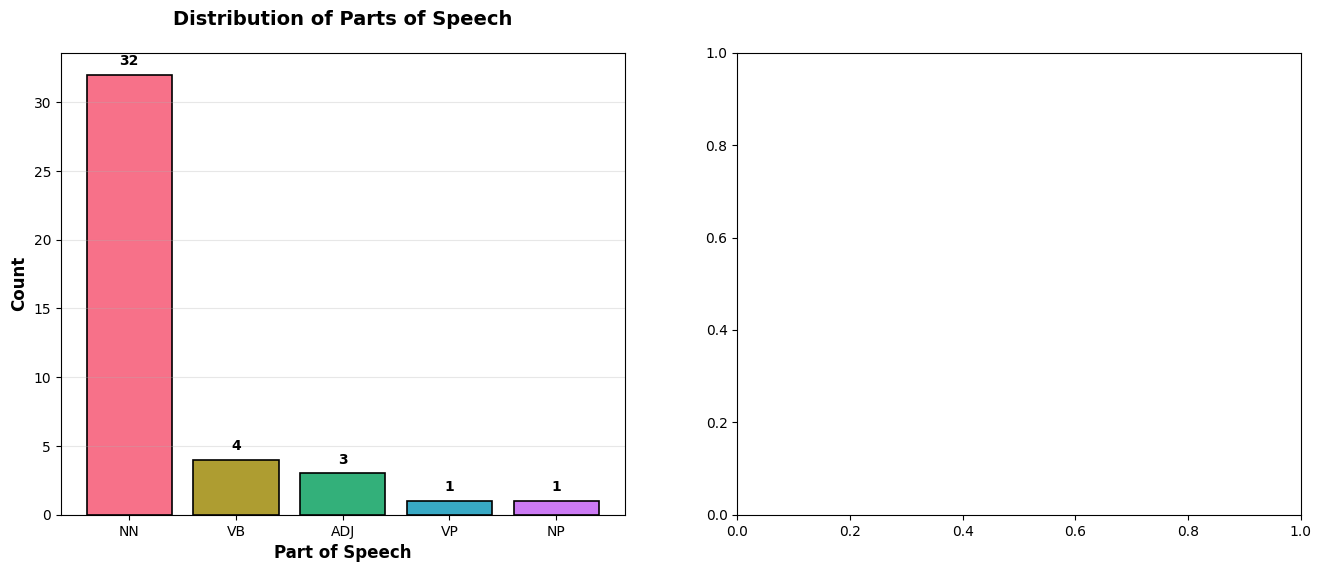

In [42]:
fig, axes = plt.subplots(1, 2, figsize=(16, 6))
pos_counts = aviation_merged_df['Part of Speech (POS)'].value_counts()
colors = sns.color_palette("husl", len(pos_counts))
axes[0].bar(pos_counts.index, pos_counts.values, color=colors, edgecolor='black', linewidth=1.2)
axes[0].set_xlabel('Part of Speech', fontsize=12, fontweight='bold')
axes[0].set_ylabel('Count', fontsize=12, fontweight='bold')
axes[0].set_title('Distribution of Parts of Speech', fontsize=14, fontweight='bold', pad=20)
axes[0].grid(axis='y', alpha=0.3)
for i, (idx, val) in enumerate(pos_counts.items()):
    axes[0].text(i, val + 0.5, str(val), ha='center', va='bottom', fontweight='bold')

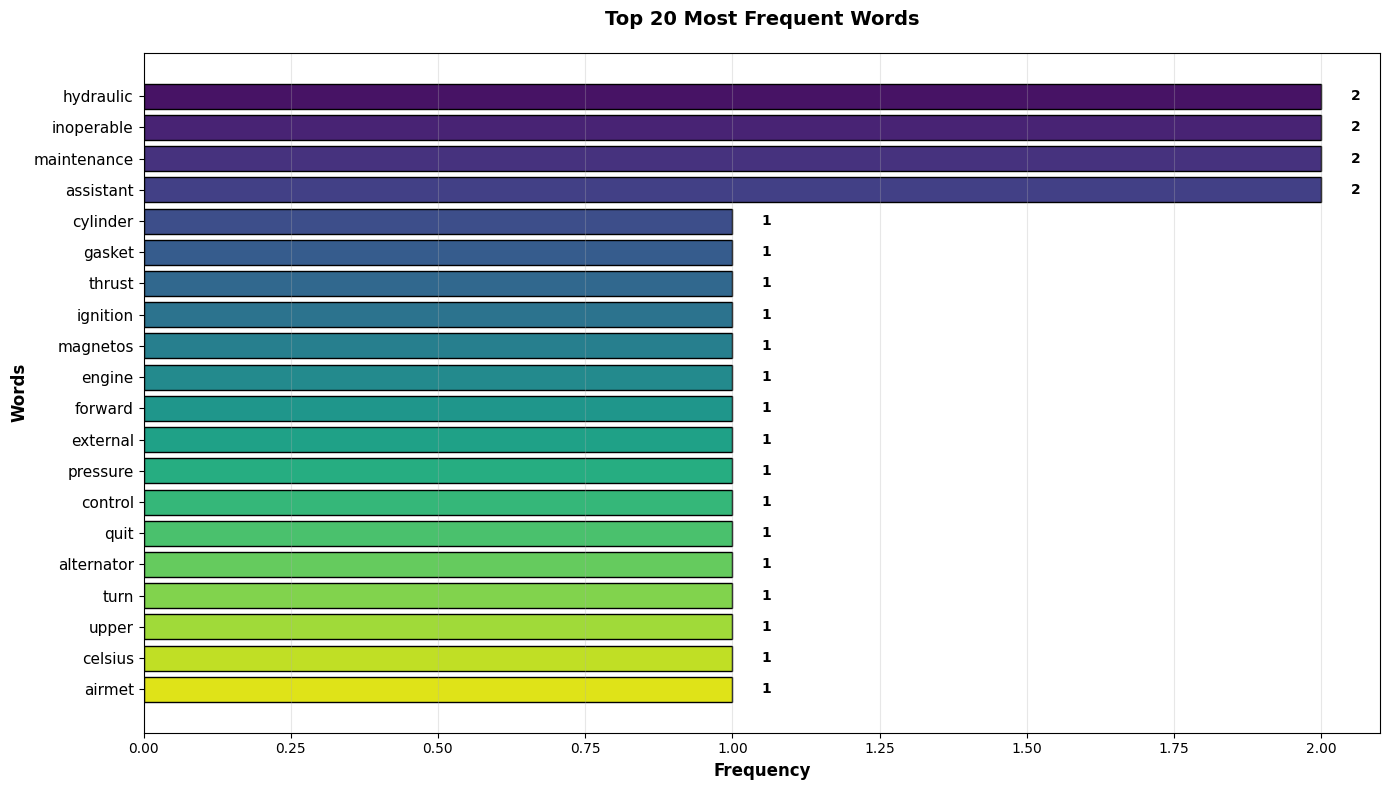

In [43]:
word_freq = aviation_merged_df['word'].value_counts().head(20)

fig, ax = plt.subplots(figsize=(14, 8))
colors = sns.color_palette("viridis", len(word_freq))
bars = ax.barh(range(len(word_freq)), word_freq.values, color=colors, edgecolor='black', linewidth=1)
ax.set_yticks(range(len(word_freq)))
ax.set_yticklabels(word_freq.index, fontsize=11)
ax.set_xlabel('Frequency', fontsize=12, fontweight='bold')
ax.set_ylabel('Words', fontsize=12, fontweight='bold')
ax.set_title('Top 20 Most Frequent Words', fontsize=14, fontweight='bold', pad=20)
ax.invert_yaxis()
ax.grid(axis='x', alpha=0.3)
for i, (bar, val) in enumerate(zip(bars, word_freq.values)):
    ax.text(val + 0.05, i, str(val), va='center', fontweight='bold')

plt.tight_layout()
plt.show()

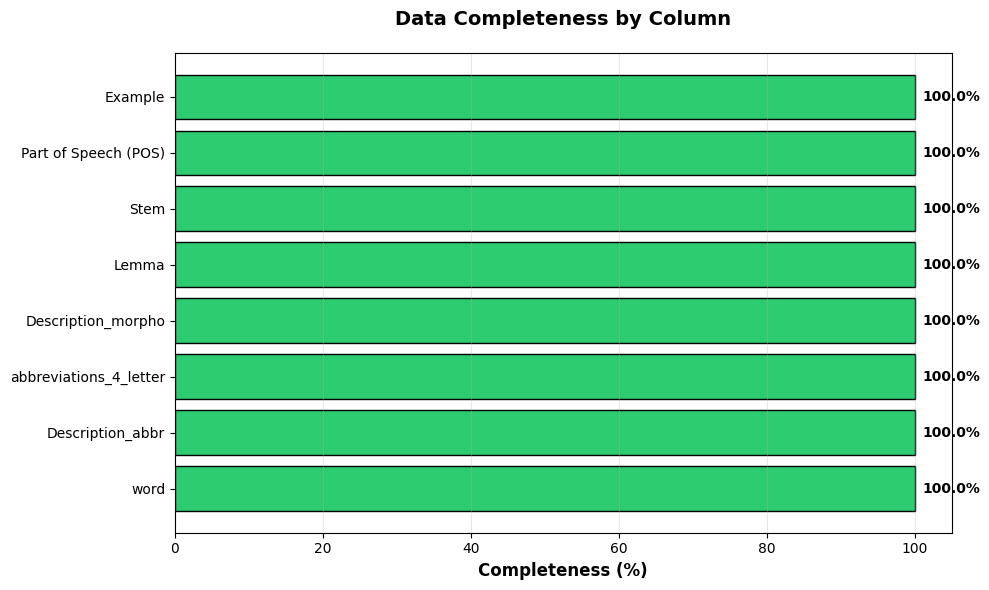

In [44]:
completeness = {}
for col in aviation_merged_df.columns:
    non_null = aviation_merged_df[col].notna().sum()
    completeness[col] = (non_null / len(aviation_merged_df)) * 100

fig, ax = plt.subplots(figsize=(10, 6))
colors_comp = ['#2ecc71' if v == 100 else '#e74c3c' for v in completeness.values()]
bars = ax.barh(list(completeness.keys()), list(completeness.values()),
               color=colors_comp, edgecolor='black', linewidth=1)
ax.set_xlabel('Completeness (%)', fontsize=12, fontweight='bold')
ax.set_title('Data Completeness by Column', fontsize=14, fontweight='bold', pad=20)
ax.set_xlim(0, 105)
ax.grid(axis='x', alpha=0.3)

for i, (bar, val) in enumerate(zip(bars, completeness.values())):
    ax.text(val + 1, i, f'{val:.1f}%', va='center', fontweight='bold')

plt.tight_layout()
plt.show()